# Control en Espacio de Estados

***Describir los sistemas en el espacio de estados y encontrar un controlador para esta representación.***

In [1]:
# Importamos librerias que utilizaremos en el notebook

%matplotlib inline

import control
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy
import sympy
import ipywidgets as widgets

sympy.init_printing()

!mkdir diagrams;

A subdirectory or file diagrams already exists.


<table>
    <tr></tr>
    <tr>
        <td><img src="http://cpm.davinsony.com/clases/svg/python.svg" width="100px"></td>
        <td><img src="http://cpm.davinsony.com/clases/svg/sympy.svg" width="130px"></td>
        <td><img src="http://cpm.davinsony.com/clases/svg/matplotlib.svg" width="300px"></td>
        <td><img src="http://cpm.davinsony.com/clases/svg/numpy.svg" width="200px"></td>
        <td><img src="http://cpm.davinsony.com/clases/svg/ipywidgets.svg" width="200px"></td>
    </tr>
</table>

## Repaso sobre Control de Sistemas Mecatrónicos

Podemos definir un _sistema_ como algo que cambia en el tiempo, _control_ es influenciar ese cambio. 

## Elementos básicos de un sistema de control 

| Elemento    | Descripción |
|:-----------:|:------------|
| Estado      | Es la representación del sistema en un momento dado |
| Dinámica    | Descripción de cómo el estado del sistema evoluciona |
| Referencia  | Es el cambio que queremos generar en el sistema |
| Salida      | Es la medida de algun aspecto del sistema que queremos influenciar |
| Entrada     | Es la señal que necesitamos manipular para lograr que la salida sea lo más cercana a la referencia |
| Realimentación | Lo que nos permite relacionar las salidas con las entradas | 


La ***realimentación*** es la clave para poder hacer un buen control.

## Objetivos a la hora de hacer control

|Objetivo     | Descripción |
|:-----------:|------------:|
|Estabilidad  | Es lograr que el sistema no explote | 
|Seguimiento  | Es lograr que el sistema cumpla con mi deseo | 
|Robutez      | Es lograr que a pesar de perturbación el sistema siga siendo estable |   
|Inmunidad a perturbaciones | Es lograr que el sistema cumpla con mi deseo a pesar de los obstaculos | 
|Optimo       | Hacer el control de la mejor manera posible | 

Las estrategias de control eficaz se basan en modelos predictivos

## Implementando un controlador

Los controladores actualmente se programan dentro de un computador el cual discretiza el tiempo con su tiempo de reloj. En cambio las leyes física están en tiempo continuo. Por lo que para controlar elemento físico debemos generar una discretización de los controladores que vamos a implementar. 

## Control de la velocidad crucero (Ejemplo)

Queremos que un vehículo vaya a una velocidad deseada $r = 70$. 

- Para diseñar el controlador de este sistema, necesitamos conocer primero el modelo del sistema, de Newton sabemos que: 

    $$F = m\, a$$

- Aquí, podemos conocer todo lo que queremos saber del sistema conociendo su velocidad $x$ (el uso de la variable $x$ es la generalidad para las variables de estado).

    $$F = m\, \dot{x}$$

- Una señal de entrada que nos permita controlar la velocidad del vehículo sería la presión sobre el accelerador del vehiculo. Esta señal de entrada podemos suponer esta directamente relacionada con la fuerza que el vehículo puede generar. 

    $$F = c\, u$$

    aquí, $u$ es la señal del acelerador y $c$ un coeficiente de relación. Luego
    
    $$\dot{x} = \frac{c}{m}u$$

- Para diseñar el controlador:
    - asumimos que podemos medir la velocidad con un tacometro  $y=x$. 
    - tenemos que la señal de control debe ser función de la referencia y la medida $u=f(r,y)=f(r-y)=f(e)$
    
A veces modelos simples funcionan...

[DARPA Urban Challenge (2007)](https://youtu.be/aHYRtOvSx-M)

## Propiedades de un buen controlador o señal de control

1. Un error $e$ pequeño generará una señal de control $u$ pequeña. 
2. La señal de control no debería cambiar de forma violenta. 
3. No se debe depender de conocer todos los parámetros del sistema. 

En el ejemplo anterior queremos que:

- $x$ tienda a $r$ cuanto $t$ tienda a $\infty$
- o lo que es lo mismo que $r-y = e$ tiena a $0$ 

# Intento #1 de control de velocidad 

Supongamos una señal de control:

$$ 
u = 
\left\{
\begin{array}{ll}
    u_{max} & \quad e > 0 \\
    -u_{max} & \quad e < 0 \\
    0 & \quad e = 0
\end{array}
\right. 
$$

Con este controlador estamos dañando el carro.

**Problema:** El controlador sobre reacciona a pequeños errores

## Intento #2 de control de velocidad 
### Regulador P

Supongamos una señal de control: 

$$u = k\,e$$

siendo $k$ la ganancia de controlador, un control lineal. 

- Un control donde pequeños errores generar pequeñas señales de control 
- Un control suave
- Control proporcional 

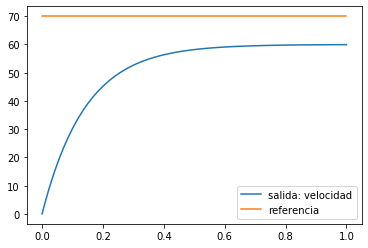

In [3]:
c = 60
m = 10 
gamma = 1

vehiculo = control.tf(c/m,[1,gamma])

K = 1
closedLoop = control.feedback(vehiculo*K,1)

t,y = control.step_response(70*closedLoop);
plt.plot(t,y,[t[0],t[-1]],[70,70]);
plt.legend(["salida: velocidad","referencia"]);

**Problema:** La referencia llega a 70 y la salida llega a 60. 

En estado estacionario : 

$$0 = \dot{x} = \frac{c}{m}u - \gamma x = \frac{c}{m}K(r-x) - \gamma x$$

entonces,

$$x = \frac{cK}{cK+m\gamma}r < r$$

$\gamma r$ es la resistencia del viento

### Modelo del vehículo

$$\dot{x} = \frac{c}{m}u - \gamma x$$

Recordemos que un controlador deberia:

- Ser estable
- Seguir la referencia 
- Ser robusto

## Intento #3 de control de velocidad 

Supongamos una señal de control: 

$$u = k\,e+\gamma \frac{m}{c}x$$

con este nuevo controlador tendremos un estado estacionario :

$$\dot{x} = 0 = \frac{c}{m}K(r-x)+\gamma x - \gamma x$$

lo que significa que $x=r$ en estado estacionario!

Este tercer intento es estable, sigue la referencia pero no es robusto, porque, nosotros no conocemos perfectamente y todo el tiempo los valores de $\gamma$, $m$ y $c$. Estos valores pueden variar. 

## Análisis de regulador P

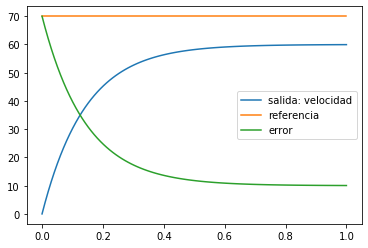

In [4]:
plt.plot(t,y,[t[0],t[-1]],[70,70],t,70-y);
plt.legend(["salida: velocidad","referencia","error"]);

para el regulador P, la señal del error llevo al vehículo hasta la velocidad final mostrada, se necesita otro medio para acercarlo a la referencia. Y este medio es la integral del error, que se va a ir acumulando hasta generar una señal lo suficientemente fuerte para llegar al objetivo. 

## Intento #4 de control de velocidad

Supongamos una señal de control: 

$$u(t)=K_p\,e(t)+K_I \int_o^t e(\tau)d\tau$$

Para este sistema este controlador es **estable**, **sigue la referencia** y es **robusto**

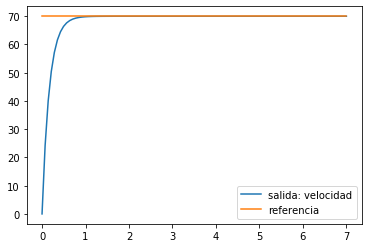

In [5]:
c = 60
m = 10 
gamma = 1

vehiculo = control.tf(c/m,[1,gamma])

KP = 1
KI = 1
s  = control.tf([1,0],1)  
K  = KP + KI/s
closedLoop = control.feedback(vehiculo*K,1)

t,y = control.step_response(70*closedLoop);


plt.plot(t,y,[t[0],t[-1]],[70,70]);
plt.legend(["salida: velocidad","referencia"]);

En la gráfica anterior podemos ver que el sistema llega al objetivo. Esto sucede bien en algunos casos, en otros pueden presentarse oscilaciones. 

Al aumentar mucho $K_I$, se pueden dar oscilaciones que se corrigen con un componente derivativo en el controlador. 

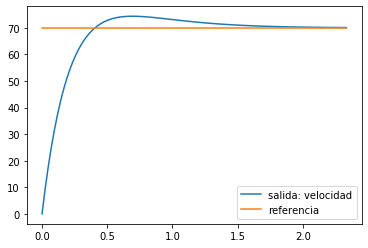

In [6]:
c = 60
m = 10 
gamma = 1

vehiculo = control.tf(c/m,[1,gamma])

KP = 1
KI = 2
s  = control.tf([1,0],1)  
K  = KP + KI/s
closedLoop = control.feedback(vehiculo*K,1)

t,y = control.step_response(70*closedLoop);


plt.plot(t,y,[t[0],t[-1]],[70,70]);
plt.legend(["salida: velocidad","referencia"]);

## Intento #5 de control de velocidad
### Regulador PID

Supongamos una señal de control: 

$$u(t)=K_p\,e(t)+K_I \int_o^t e(\tau)d\tau + K_D \frac{d}{dt}e(t)$$

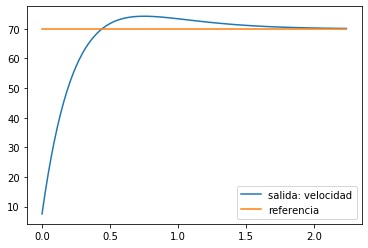

In [7]:
c = 60
m = 10 
gamma = 1

vehiculo = control.tf(c/m,[1,gamma])

KP = 1
KI = 2
KD = 0.02
s  = control.tf([1,0],1)  
K  = KP + KI/s + KD*s
closedLoop = control.feedback(vehiculo*K,1)

t,y = control.step_response(70*closedLoop);


plt.plot(t,y,[t[0],t[-1]],[70,70]);
plt.legend(["salida: velocidad","referencia"]);

## Control PID

- **P** ayuda a la estabilidad, tiene un efecto medio en la velocidad de respuesta del sistema. 
- **I** permite el seguimiento de la referencia y evita perturbaciones, tiene un efecto bajo en la velocidad de respuesta del sistema. Puede causar oscilaciones. 
- **D** tiene un efecto alto en la velocidad de respuesta del sistema. Es muy sensible al ruido. 

El **PID** es el controlador de bajo nivel más usado en el mundo. 

_La estabilidad no esta garantizada_
_La realimentación tiene la habilidad de combatir contra la incertidumbre en los parámetros del modelo_.

# Implementación de un control PID

$$u(t)=K_p\,e(t)+K_I \int_o^t e(\tau)d\tau + K_D \frac{d}{dt}e(t)$$

¿Cómo llevo la ecuación del PID a un tiempo discreto con tiempo de muestreo $\Delta t$

- La derivadad se aproxima:

    $$\dot{e} \approx \frac{e_{new}-e_{old}}{\Delta t}$$
    
- La integral se aproxima con la integración de Riemann:

    $$E_{new} = E_{old} + e$$
    
    donde $E$ es una suma.

## Representación en el espacio de estados

Es una representación matricial de un sistema lineal la cual permite representar sistemas MIMO (multiple-input multiple-output) entre otros. La representación cuenta con dos ecuaciones:

- La ecuación de estado:

$$\dot{\mathbf{x}} = A\mathbf{x}+B\mathbf{u}$$

- La ecuación de salida:

$$\mathbf{y}=C\mathbf{x}+D\mathbf{u}$$

donde $\mathbf{x}$ es el vector de estados, $\mathbf{y}$ es el vector de salidas, $\mathbf{u}$ es el vector de entradas, $A$ es la matriz de estado, $B$ es la matriz de entrada, $C$ es la matriz de salida y $D$ es la matriz de transmision directa. 

In [8]:
%%file diagrams/ss_block.gv
// Closed loop diagram
digraph {
    graph [splines=ortho]
    rankdir = LR
    
    node[shape=none,width=0.4]
    u   [label="u"]
    y   [label="y"]
    
    node[style=filled, fillcolor=lightgray, shape=rectangle,width=0.7,height=0.7,fixedsize=false]
    SS  [label="ecuaciones del espacio de estados"]

    // Edges
    u -> SS -> y
}

Overwriting diagrams/ss_block.gv


In [9]:
from graphviz import Source
sourcefile = 'diagrams/ss_block.gv' 
gv = open(sourcefile)
dot = Source(gv.read(),engine="dot",format="svg",filename = sourcefile)
dot.render(sourcefile,view=False);

### Matrices del espacio de estados

- $A$ También conocida como la matriz dinámica, es la matriz más importante ya que contiene las leyes físicas que describe el sistema. 
- $B$ También conocida como la matriz de los actuadores. Muestra como las entradas afecta los estados, valores de B más grandes implica actuadores más poderosos. Esta matriz nos describe el comportamiento de los actuadores. 
- $C$ También conocida como la matriz de los sensores. Describe como podemos nosotros recibir información del sistema. 

Cuando nosotros diseñamos un sistema estamos diseñando dichas matrices. 

![](diagrams/ss_block.gv.svg)

Para el control del sistema, la pregunta es:

$$\textbf{¿Cómo debe ser la entrada seleccionada?}$$

para lograr que el sistema haga lo que yo quiero. 

## Estudiemos el espacio de estados 

Para esto usaremos la ecuación diferencial de un sistema masa-resorte-amortiguador (**MKC**).

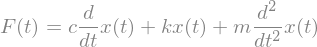

In [10]:
t,m,c,k = sympy.symbols('t m c k')
F = sympy.Function('F')(t)
x = sympy.Function('x')(t)

eqMKC = sympy.Eq(F,m*sympy.diff(x,t,2)+c*sympy.diff(x,t)+k*x)
display(eqMKC)

Inicialmente construyamos un diagrama de bloques que represente esta ecuación.

In [11]:
%%file diagrams/masa_resorte_amortiguador.gv
// Closed loop diagram
digraph {
    graph [splines=ortho]
    
    node[shape=point, fillcolor=black]
    N1  [pos="5.2,0!"]
    N2  [pos="7,0!"]
    
    node[shape=none,width=0.4]
    F   [pos="0,0!",label="F(s)"]
    X   [pos="8,0!",label="X(s)"]
    
    node[style=filled, fillcolor=lightgray,shape=circle, label="", width=0.3]
    S1  [pos="1,0!"]
    S2  [pos="2,0!"]
    
    node[shape=rectangle,width=0.7,height=0.7,fixedsize=true]
    iM  [pos="3,0!",label="1/m"]
    I1  [pos="4.5,0!",label="1/s"]
    I2  [pos="6,0!",label="1/s"]
    C   [pos="3,-1!",label="c"]
    K   [pos="3,-2!",label="k"]

    // Edges
    F  -> S1 -> S2  [headlabel="+"]
    S2 -> iM 
    iM -> I1        [taillabel=" s²X(s)"]
    I1 -> N1        [dir=none]
    N1 -> I2    
    I2 -> N2        [dir=none]
    N2 -> X
    N1 -> C
    C  -> S2        [headlabel="-  "]
    N2 -> K
    K  -> S1        [headlabel="-  "]
}

Overwriting diagrams/masa_resorte_amortiguador.gv


In [12]:
from graphviz import Source
sourcefile = 'diagrams/masa_resorte_amortiguador.gv' 
gv = open(sourcefile)
dot = Source(gv.read(),engine="neato",format="svg",filename = sourcefile)
dot.render(sourcefile,view=False);

### Diagrama de bloques del sistema MKC

![](diagrams/masa_resorte_amortiguador.gv.svg)

Se evidencia el uso de dos bloques integradores. El uso de estos bloques da indicios de los estados de este sistema, de cada bloque integrador tenemos, la posición $x(t)$ y la velocidad $\dot{x}(t)$ de la masa. Estos son los estados del sistema.  

### Construccion del vector de estados $x$

Sabemos del diagrama de bloques que la posición $x(t)$ y la velocidad $\dot{x}(t)$ son los estados del sistema.

Con estos podemos construir el vector de estados: 

$$\mathbf{x} = \left[\begin{array}{}\dot{x}(t)\\{x}(t)\end{array}\right] =\left[\begin{array}{}x_1\\x_2\end{array}\right]$$

Con $x_1$ y $x_2$, podemos reescribir la ecuación diferencial como:

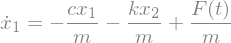

In [13]:
x1, x2, dx1, dx2 = sympy.symbols('x_1 x_2 \dot{x}_1 \dot{x}_2')

eqMKC = eqMKC.subs(sympy.diff(x,t,2),dx1)
eqMKC = eqMKC.subs(sympy.diff(x,t),x1)
eqMKC = eqMKC.subs(x,x2)

sol_dx1 = sympy.Eq(dx1,sympy.expand(sympy.solve(eqMKC,dx1)[0]))
sol_dx2 = sympy.Eq(dx2,x1)
display(sol_dx1)

Falta la expresion para $\dot{x}_2$. La cual es simplemente 

$\dot{x}_2 = x_1$

De aquí ya podemos construir la ecuación de estado.

### Ecuación de estado para el sistema MKC

De la ecuaciones anteriores podemos contruir la ecuación matricial de estados:

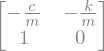

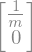

In [14]:
MA = sympy.Symbol('A'); display(MA)
mA = sympy.Matrix([[-c/m,-k/m],[1,0]])
display(mA)

MD = sympy.Symbol('D'); display(MD)
display(sympy.Matrix([1/m,0]))

### Estabilidad del sistema MKC

Para verificar la estabilidad del sistema debemos evaluar los valores propios ($\lambda$) de la matriz $A$:

$$I-\lambda A$$

para encontrarlo encontremos la ecuación caracteristica con $\textbf{det}(I-\lambda A)$:

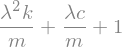

In [15]:
l = sympy.Symbol('\lambda')
caract = (sympy.eye(2)-l*mA).det();
display(caract)

de aquí los valores propios son: 

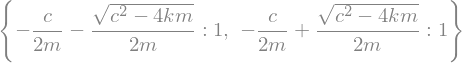

In [16]:
display(mA.eigenvals())

Vemos que son los mismos polos del sistema MKC si lo analizamos de forma clásica. 

# Una particula en una linea recta sin fricción

Diseñemos un control proporcional para el sistema propuesto, utilizando el espacio de estados.

$$m \ddot{x} = F$$

La ecuación de estado quedaría asi (con $m=1$). 

$$\dot{\mathbf{x}}=\left[\begin{array}{}0&1\\0&0\end{array}\right]\mathbf{x}+\left[\begin{array}{}0\\1\end{array}\right]\mathbf{u}$$

La ecuación de salida sería.

$$\mathbf{y}=\left[\begin{array}{}1&0\end{array}\right]\mathbf{x}$$

### Control de la particula

Si queremos controlar el sistema con un lazo cerrado debemos conectar de alguna forma la salida $\mathbf{y}$ con la entrada $\mathbf{u}$

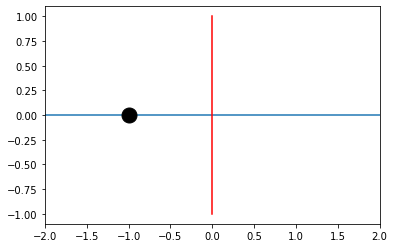

In [17]:
plt.plot([-2,2],[0,0])
plt.plot([0,0],[-1,1],color='r')
plt.plot([-1],[0],color='k',marker='.',markersize=30)
plt.xlim(-2,2);

El objetivo de control es que se mueva al origen. **¿Cómo lo logramos?**

$$\left.\begin{array}{}u>0 \text{ si } y<0 \\ u<0 \text{ si } y>0\end{array}\right\}\qquad \to \qquad u=-y$$

### Modificación de la dinamica del sistema 

En general tenemos: 

$$\mathbf{u}=-K\mathbf{y} = -KC\mathbf{x} $$

entonces: 

$$\dot{\mathbf{x}}=A\mathbf{x}+B\mathbf{u}=A\mathbf{x}-BKC\mathbf{x} = \left(A-BKC\right)\mathbf{x}$$

tenemos aquí un nuevo sistema, el sistema en lazo cerrado.

$$\dot{\mathbf{x}} = \left(A-BKC\right)\mathbf{x}=\hat{A}\mathbf{x}$$

nuestro trabajo ahora es seleccionar $K$ de tal forma que los valores propios de la matriz $\hat{A}$ den por lo menos un sistema estable. 

### La matriz de estado del sistema en lazo cerrado

Remplazamos los valores de las matrices y de $K=1$:

$$\hat{A}=\left(A-BKC\right)=\left(\left[\begin{array}{}0&1\\0&0\end{array}\right]-\left[\begin{array}{}0\\1\end{array}\right]1\left[\begin{array}{}1&0\end{array}\right]\right)$$

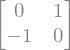

In [18]:
mA = sympy.Matrix([[0,1],[0,0]])-sympy.Matrix([0,1])*1*sympy.Matrix([[1,0]])
display(mA)

Analizando los valores propios del sistema tenemos que: 

In [19]:
display(mA.eigenvals())

El sistema es criticamente estable. 

### Respuesta de la particula al lazo cerrado

Con el controlador propuesto, la particula se comporta como se muestra. 

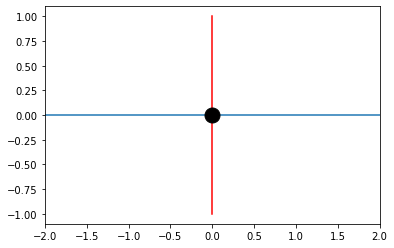

In [20]:
plt.rcParams["animation.html"] = "html5"#"jshtml"

t = numpy.linspace(0,2*numpy.pi,40)
x = numpy.sin(t)

fig, ax = plt.subplots();

ax.plot([-2,2],[0,0])
ax.plot([0,0],[-1,1],color='r')
plt.xlim(-2,2);
l, = ax.plot([0],[0],color='k',marker='.',markersize=30)

animate = lambda i: l.set_data([x[i]], [0]);

ani = FuncAnimation(fig, animate, frames=len(t), interval=1000/40);

In [21]:
display(ani)

**¿Por qué no se queda en el origen si este es el objetivo?**

- No tenemos en cuenta la velocidad. 
- Necesitamos la información del estado (posición,velocidad) del sistema para estabilizarlo.

### Estabilizando la particula 

Para estabilizar la particula necesitamos conocer la información de todos los estados del sistema. Salvo que en nuestro sistema solo tenemos un sensor de posición:

$$\mathbf{y}=\left[\begin{array}{}1&0\end{array}\right]\mathbf{x}$$

El estado desconocido es la velocidad, el cual puede ser estimado de la posición. Por ahora supongamos que podemos medir ambos estados. 

$$\mathbf{y}_{supuesto}=\left[\begin{array}{}1&0\\0&1\end{array}\right]\mathbf{x}$$

con esta nueva matriz $C$, proponemos un controlador $K$:

$$K = \left[\begin{array}{}k_1&k_2\end{array}\right]$$

Encontremos la nueva matriz $\hat{A}$ para el sistema en lazo cerrado.

### Nueva matriz de estado del sistema en lazo cerrado

Recordemos que aquí estamos suponiendo que podemos medir ambos estados del sistema (posición y velocidad). Remplazamos los valores de las matrices y de $K$:

$$\hat{A}=\left(A-BKC\right)=\left(\left[\begin{array}{}0&1\\0&0\end{array}\right]-\left[\begin{array}{}0\\1\end{array}\right]\left[\begin{array}{}k_1&k_2\end{array}\right]\left[\begin{array}{}1&0\\0&1\end{array}\right]\right)$$

Luego $\hat{A}=$

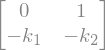

In [22]:
k1,k2 = sympy.symbols('k_1 k_2')
mA3 = sympy.Matrix([[0,1],[0,0]])-sympy.Matrix([0,1])*sympy.Matrix([[k1,k2]])*sympy.Matrix([[1,0],[0,1]])
display(mA3)

Los valores propios o polos del sistema son:

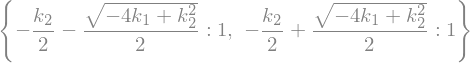

In [23]:
eigen = mA3.eigenvals()
display(eigen)

### Escogamos los valores del controlador

In [24]:
## Parametros del modelo

paramK1 = widgets.FloatSlider(value=1,min=0,max=10,step=0.1,description='k1', orientation="vertical")
paramK2 = widgets.FloatSlider(value=2,min=0,max=5,step=0.1,description='k2', orientation="vertical")

## Definicion de la simulacion

def polos(K1,K2):
    P1 = -K2/2+sympy.sqrt(K2**2-4*K1)/2
    P2 = -K2/2-sympy.sqrt(K2**2-4*K1)/2
    plt.scatter([sympy.re(P1),sympy.re(P2)],[sympy.im(P1),sympy.im(P2)])
    plt.grid()
    plt.title('Polos de la Particula en lazo cerrado con sensores de posición y velocidad')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.ylim(-3,3)
    plt.xlim(-6,0)

## Presentación de los resultados    
    
plot_exponencial = widgets.interactive_output(polos,{'K1':paramK1,'K2':paramK2})      
widgets.HBox([paramK1,paramK2,plot_exponencial])

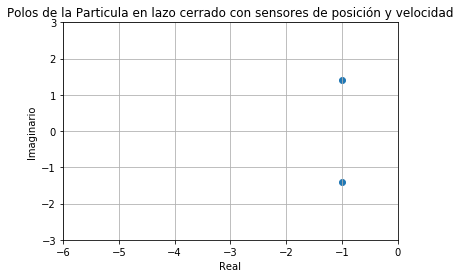

In [25]:
polos(3,2)

### Verifiquemos el comportamiento de la particula

Tomemos los valores para el controlador $k_1=1$ y $k_2=2$:

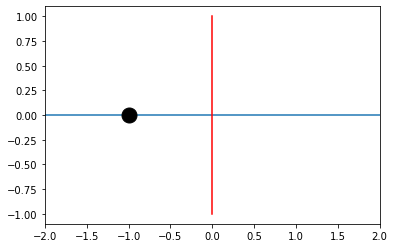

In [26]:
plt.rcParams["animation.html"] = "html5"#"jshtml"

particula = control.ss('0 1;-1 -2','1;0','1 0','0')
t,x = control.impulse_response(particula)

fig, ax = plt.subplots();

ax.plot([-2,2],[0,0])
ax.plot([0,0],[-1,1],color='r')
plt.xlim(-2,2);
l, = ax.plot([0],[0],color='k',marker='.',markersize=30)

animate = lambda i: l.set_data([-x[i]], [0]);

ani = FuncAnimation(fig, animate, frames=len(t), interval=1000/40);

In [27]:
display(ani)

## Posicionamiento de polos

El posicionamiento de polos nos permite definir el comportamiento deseado del sistema. Tomemos como ejemplo es caso anterior de la particula, cuya ecuación de estados se presenta a contuación:

$$\dot{\mathbf{x}}=\left[\begin{array}{}0&1\\0&0\end{array}\right]\mathbf{x}+\left[\begin{array}{}0\\1\end{array}\right]\mathbf{u}$$

A traves de la libreria de control de python, podemos obtener los valores del controlador que nos permita tener de comportamiento deseado. Con `contro.place(A,B,poles)` obtenemos los siguientes valores para los polos [-1,-2]

In [28]:
A4 = [[0,1],[0,0]]
B4 = [[0],[1]]

display(control.place(A4,B4,[-1,-2]))
#display(control.acker(A4,B4,[-1,-2]))

array([[2., 3.]])

### Contra ejemplo

Con el siguiente sistema no se le puede ubicar los polos. 

$$\dot{\mathbf{x}}=\left[\begin{array}{}2&0\\1&1\end{array}\right]\mathbf{x}+\left[\begin{array}{}1\\1\end{array}\right]\mathbf{u}$$

El controlador para dicho sistema seria: 

In [29]:
A4 = [[2,0],[1,1]]
B4 = [[1],[1]]

display(control.place(A4,B4,[-21,-20]))

array([[-6.36905167e+15,  6.36905167e+15]])

In [33]:
# http://damianavila.github.io/blog/posts/hide-the-input-cells-from-your-ipython-slides.html

!jupyter nbconvert --to slides --template output_toggle espacio-estados.ipynb

[NbConvertApp] Converting notebook espacio-estados.ipynb to slides
[NbConvertApp] Writing 462372 bytes to espacio-estados.slides.html
